
### Basic settings and parameters


`EBTgymEnv()` class comes preconfigured for quick setting. Basicaly one need to provide at least data file to set it up. Here all parameters are set to defaults values.
- One can eyeball internal environment parameters by looking at nested  `MyEnvironment.params` dictionary consisting of three subdictionaries:
   - `params_dataset`,  
   - `params_engine`,
   - `params_other`.
 

- Look at source files for exact parameters descriptions, since complete doc reference is yet to come.


In [1]:
from btgym import BTgymEnv

# Simpliest trading environment,
# using year-long dataset of one minute bars for EUR/USD currensy pair: 

 
MyEnvironment = BTgymEnv(filename='./data/DAT_ASCII_EURUSD_M1_2016.csv',)

# Print parameters and default values:

for params_name, params_dict in MyEnvironment.params.items():
    print('\nParameters [{}] subset: '.format(params_name))
    for key, value in params_dict.items():
        print('{} : {}'.format(key,value))
            


Parameters [dataset] subset: 
filename : ./data/DAT_ASCII_EURUSD_M1_2016.csv
start_weekdays : [0, 1, 2]
start_00 : True
episode_len_days : 1
episode_len_hours : 23
episode_len_minutes : 55
time_gap_days : 0
time_gap_hours : 5
sep : ;
header : 0
index_col : 0
parse_dates : True
names : ['open', 'high', 'low', 'close', 'volume']
timeframe : 1
datetime : 0
open : 1
high : 2
low : 3
close : 4
volume : -1
openinterest : -1

Parameters [engine] subset: 
state_dim_time : 10
state_dim_0 : 4
state_low : 1.03522
state_high : 1.1616
portfolio_actions : ('hold', 'buy', 'sell', 'close')
start_cash : 10.0
broker_commission : 0.001
fixed_stake : 10
drawdown_call : 90

Parameters [other] subset: 
port : 5500
verbose : 0


### Specifying more controls:
There is example of slightly tweaked setup.
 
- There's some more parameters, especially at dataset section. Those are related to correct CSV data parsing and better left default until you pick different data source. See BTgymDataset() class source for explanations.

In [6]:
MyEnvironment = BTgymEnv(filename='../examples/data/DAT_ASCII_EURUSD_M1_2016.csv',
                         
                     # Dataset and single random episode related parameters:
                         
                         # We start trading on mondays, thuesdays and wednesdays:
                         start_weekdays=[0, 1, 2],
                         # Want total episode duration to be no more than 1 day 23h 55min:
                         episode_len_days=1,
                         episode_len_hours=23,
                         episode_len_minutes=55,
                         # Want to start every episode at the begiining of the day:
                         start_00=True,
                         
                     # Broker and trade realted:
                         
                         # Set initial capital:
                         start_cash=100,
                         # Set broker commission as 0.2% of operation value:
                         broker_commission=0.002,
                         # We use fixed stake of size 10:
                         fixed_stake=10,
                         # We want stop episode if 30% of initial capital is lost:
                         drawdown_call=30,
                         
                     # RL environment related parameters:
                         
                         # Set time embedding dimensionality;
                         # that's basically means we get sequence of last 30 price values
                         # as space observation: 
                         state_dim_time=30,
                         
                         # Observations min and max. possible values.
                         # Setting these to None forces environment to infer from entire dataset.
                         # Since our obs. space simply consisits of series of prices (by default)
                         # - it's quite reasonable.
                         state_low=None,
                         state_high=None,
                         
                     # Other parameters:
                         
                         # Network port to use:
                         port=5555,
                         # Be chatty: settting this to 1 makes environment report what's going on;
                         # 2 is for debugging, dumps out a lot of data:
                         verbose=1,)


[2017-06-21 21:24:09,042] Using base BTgymDataset class.
[2017-06-21 21:24:09,044] Using base BTgymStrategy class.
[2017-06-21 21:24:09,772] Sucsessfuly loaded 372678 records from <../examples/data/DAT_ASCII_EURUSD_M1_2016.csv>.
[2017-06-21 21:24:09,857] Dataset summary statistic:
                open           high            low          close    volume
count  372678.000000  372678.000000  372678.000000  372678.000000  372678.0
mean        1.107109       1.107198       1.107019       1.107108       0.0
std         0.024843       0.024840       0.024847       0.024844       0.0
min         1.035250       1.035470       1.035220       1.035220       0.0
25%         1.092140       1.092230       1.092040       1.092140       0.0
50%         1.113530       1.113610       1.113450       1.113530       0.0
75%         1.124710       1.124780       1.124630       1.124710       0.0
max         1.161440       1.161600       1.160770       1.161450       0.0
[2017-06-21 21:24:09,858] Data flu


### Registering environment:
OpenaAI way of making environment is to register it with cpecific set of parameters under some unique name and instantiate it via calling  `make()` method. This helps for standartization and correct evaluation of results uploaded to Gym board. 
 
That's how you do it (same parameters as above):

In [10]:
import gym

# Set single dictionary of parameters:
env_params = dict(filename='../examples/data/DAT_ASCII_EURUSD_M1_2016.csv',
                  start_weekdays=[0, 1, 2],
                  episode_len_days=1,
                  episode_len_hours=23,
                  episode_len_minutes=55,
                  start_00=True,
                  start_cash=100,
                  broker_commission=0.002,
                  fixed_stake=10,
                  drawdown_call=50,
                  state_dim_time=30,
                  state_low=None,
                  state_high=None,
                  port=5555,
                  verbose=1,)

# register with unique name (watch out for OpenAI namesetting conventions):
gym.envs.register(id='backtrader-v46',
                  entry_point='btgym:BTgymEnv',
                  kwargs=env_params)

# Make environment:
                  
MyEnvironment = gym.make('backtrader-v46')


[2017-06-22 09:15:21,075] Making new env: backtrader-v46
[2017-06-22 09:15:21,080] Using base BTgymDataset class.
[2017-06-22 09:15:21,082] Using base BTgymStrategy class.
[2017-06-22 09:15:21,929] Sucsessfuly loaded 372678 records from <../examples/data/DAT_ASCII_EURUSD_M1_2016.csv>.
[2017-06-22 09:15:22,015] Dataset summary statistic:
                open           high            low          close    volume
count  372678.000000  372678.000000  372678.000000  372678.000000  372678.0
mean        1.107109       1.107198       1.107019       1.107108       0.0
std         0.024843       0.024840       0.024847       0.024844       0.0
min         1.035250       1.035470       1.035220       1.035220       0.0
25%         1.092140       1.092230       1.092040       1.092140       0.0
50%         1.113530       1.113610       1.113450       1.113530       0.0
75%         1.124710       1.124780       1.124630       1.124710       0.0
max         1.161440       1.161600       1.160770   

### Running first agent:

Now fun part. For this example our agent will be just mindless random picker, it performs no actual training. Runing it for several episodes to see how fast all the money get lost. We'll plot states observationas as imagemaps every 500th step.

This part requires matplotlib to be installed.

In [8]:
# Plotting utility functions:

def to_string(dictionary):
    text = ''
    for k, v in dictionary.items():
        if type(v) in [float]:
            v = '{:.4f}'.format(v)
        text += '{}: {}\n'.format(k, v)
    return(text)

def plot_step(response):
    plt.title('state values min: {:.4f}  /  max: {:.4f}'.
              format(response[0].min(), response[0].max()))
    response[3].update(reward=response[1])
    plt.text(0, 3, to_string(response[3]),
             fontsize=10, fontweight='bold', color='w',
             bbox={'facecolor':'k', 'alpha':0.3, 'pad':1})
    plt.imshow(response[0], aspect='auto',cmap='PRGn', )

[2017-06-21 21:28:58,594] No running server found, starting...
[2017-06-21 21:28:58,760] Server process PID: 54194
[2017-06-21 21:28:59,626] Sucsessfuly loaded 372678 records from <../examples/data/DAT_ASCII_EURUSD_M1_2016.csv>.
[2017-06-21 21:28:59,761] Server started, pinging tcp://127.0.0.1:5555 ...
[2017-06-21 21:28:59,764] Server seems ready with response: <CONTROL_MODE, send <_reset>, <_getstat> or <_stop>.>
[2017-06-21 21:28:59,765] Starting episode.
[2017-06-21 21:28:59,768] Maximum episode time duration set to: 1 day, 23:55:00.
[2017-06-21 21:28:59,769] Respective number of steps: 2875.
[2017-06-21 21:28:59,771] Maximum allowed data time gap set to: 5:00:00.

[2017-06-21 21:28:59,774] Episode start: 2016-11-03 05:46:00, weekday: 3.
[2017-06-21 21:28:59,776] Not a good day to start, resampling...
[2017-06-21 21:28:59,778] Episode start: 2016-01-07 07:51:00, weekday: 3.
[2017-06-21 21:28:59,780] Not a good day to start, resampling...
[2017-06-21 21:28:59,781] Episode start: 2016

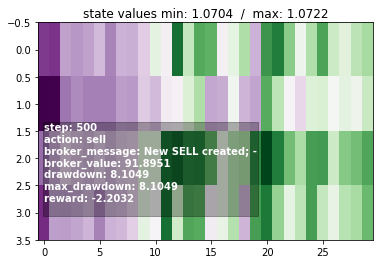

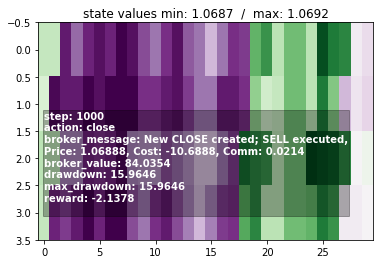

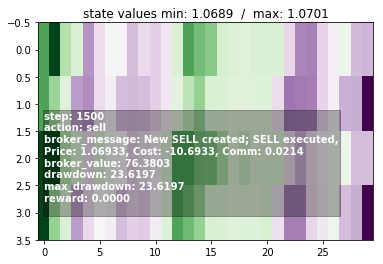

[2017-06-21 21:29:06,867] Episode elapsed time: 0:00:07.059096.


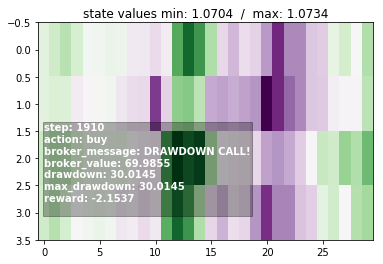

[2017-06-21 21:29:07,055] Episode statistic sent.
[2017-06-21 21:29:07,057] Starting episode.
[2017-06-21 21:29:07,058] Maximum episode time duration set to: 1 day, 23:55:00.
[2017-06-21 21:29:07,059] Respective number of steps: 2875.
[2017-06-21 21:29:07,061] Maximum allowed data time gap set to: 5:00:00.

[2017-06-21 21:29:07,063] Episode start: 2016-08-01 10:06:00, weekday: 0.
[2017-06-21 21:29:07,064] Start time ajusted to 00:00.
[2017-06-21 21:29:07,067] Episode duration: 1 day, 23:56:00.
[2017-06-21 21:29:07,069] Total episode time gap: 0:01:00.
[2017-06-21 21:29:07,070] Sample accepted.


STAT:
episode: 1
runtime: 0:00:07.059096

INFO:
step: 1910
action: buy
broker_message: DRAWDOWN CALL!
broker_value: 69.9855
drawdown: 30.0145
max_drawdown: 30.0145
reward: -2.1537



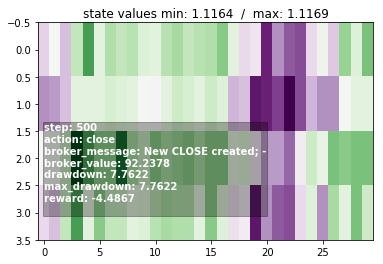

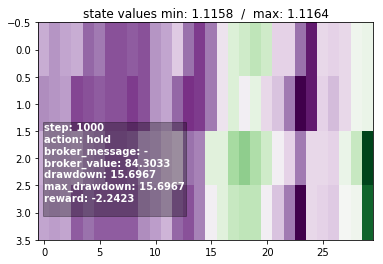

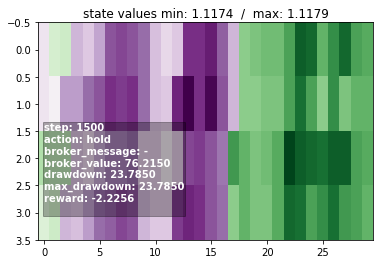

[2017-06-21 21:29:14,171] Episode elapsed time: 0:00:07.099060.


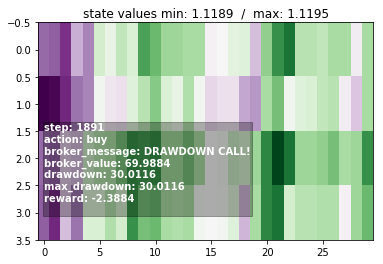

[2017-06-21 21:29:14,357] Episode statistic sent.
[2017-06-21 21:29:14,359] Starting episode.
[2017-06-21 21:29:14,360] Maximum episode time duration set to: 1 day, 23:55:00.
[2017-06-21 21:29:14,362] Respective number of steps: 2875.
[2017-06-21 21:29:14,363] Maximum allowed data time gap set to: 5:00:00.

[2017-06-21 21:29:14,366] Episode start: 2016-10-19 22:38:00, weekday: 2.
[2017-06-21 21:29:14,367] Start time ajusted to 00:00.
[2017-06-21 21:29:14,370] Episode duration: 2 days, 0:05:00.
[2017-06-21 21:29:14,371] Total episode time gap: 0:10:00.
[2017-06-21 21:29:14,373] Sample accepted.


STAT:
episode: 2
runtime: 0:00:07.099060

INFO:
step: 1891
action: buy
broker_message: DRAWDOWN CALL!
broker_value: 69.9884
drawdown: 30.0116
max_drawdown: 30.0116
reward: -2.3884



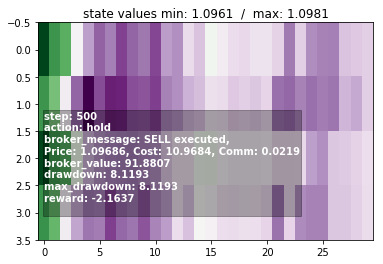

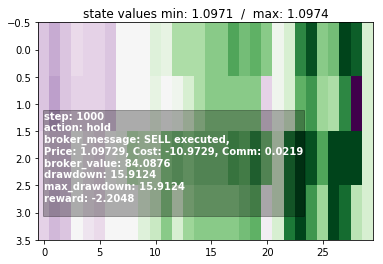

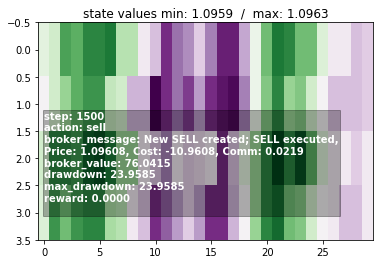

[2017-06-21 21:29:21,343] Episode elapsed time: 0:00:06.968269.


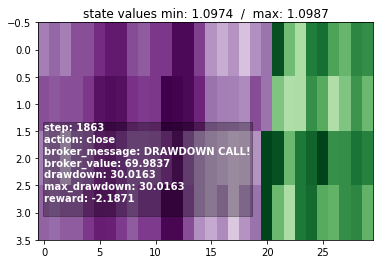

[2017-06-21 21:29:21,537] Episode statistic sent.
[2017-06-21 21:29:21,538] Starting episode.
[2017-06-21 21:29:21,540] Maximum episode time duration set to: 1 day, 23:55:00.
[2017-06-21 21:29:21,541] Respective number of steps: 2875.
[2017-06-21 21:29:21,542] Maximum allowed data time gap set to: 5:00:00.

[2017-06-21 21:29:21,545] Episode start: 2016-07-08 15:39:00, weekday: 4.
[2017-06-21 21:29:21,546] Not a good day to start, resampling...
[2017-06-21 21:29:21,548] Episode start: 2016-05-12 12:23:00, weekday: 3.
[2017-06-21 21:29:21,549] Not a good day to start, resampling...
[2017-06-21 21:29:21,550] Episode start: 2016-11-15 16:00:00, weekday: 1.
[2017-06-21 21:29:21,552] Start time ajusted to 00:00.
[2017-06-21 21:29:21,555] Episode duration: 1 day, 23:57:00.
[2017-06-21 21:29:21,557] Total episode time gap: 0:02:00.
[2017-06-21 21:29:21,558] Sample accepted.


STAT:
episode: 3
runtime: 0:00:06.968269

INFO:
step: 1863
action: close
broker_message: DRAWDOWN CALL!
broker_value: 69.9837
drawdown: 30.0163
max_drawdown: 30.0163
reward: -2.1871



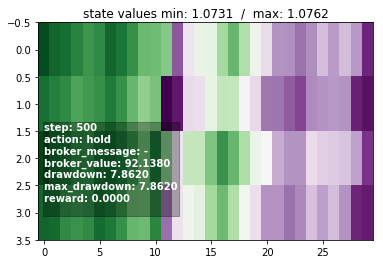

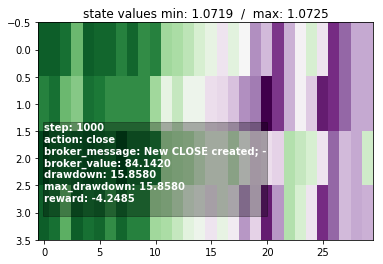

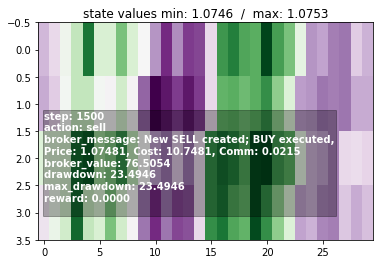

[2017-06-21 21:29:28,708] Episode elapsed time: 0:00:07.146866.


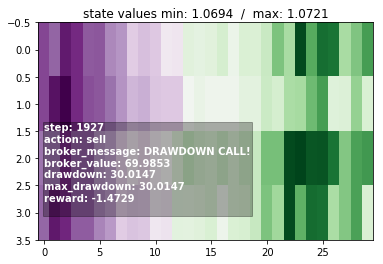

[2017-06-21 21:29:28,899] Episode statistic sent.
[2017-06-21 21:29:28,901] Server is exiting.
[2017-06-21 21:29:28,903] Server is exiting. Exit code: None


STAT:
episode: 4
runtime: 0:00:07.146866

INFO:
step: 1927
action: sell
broker_message: DRAWDOWN CALL!
broker_value: 69.9853
drawdown: 30.0147
max_drawdown: 30.0147
reward: -1.4729



In [9]:
import itertools
import random

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

# Number  episodes to run:
num_episodes = 4

# Print every:
frame_print=500

for episode in range(num_episodes):
    
    # Calling reset() before every episode.
    # Watch for log output: when called for first time, it will start the server, 
    # than samples episode and returen initial state observation (simply making one step);
    init_state = MyEnvironment.reset()
    
    # Repeat until episode end:
    for _1 in itertools.count(): 
        
        #Choose random action:
        rnd_action = int((MyEnvironment.action_space.n)*random.random())
        
        # Make a step in the environment:
        (obs, reward, done, info) = MyEnvironment.step(rnd_action)
        
        #Plot state every 500th step or when episode is finished:
        if info['step'] % frame_print == 0 or done:
    
            plt.figure(info['step'], ) #figsize=(8,8))
            plot_step((obs, reward, done, info))
            plt.show()
                
        if done: break
            
    # Print episode statistic (quite useless for now since we didn't added any observers etc.)
    print('STAT:\n{}\nINFO:\n{}'.format(to_string(MyEnvironment.get_stat()),
                                        to_string(info)))

# Just not to mess up with jupyter kernels:
MyEnvironment._stop_server()
